<a href="https://colab.research.google.com/github/JOekh1122/Logistic-Regression-Assignment/blob/main/Copy_of_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🩺 Breast Cancer Classification Project

## 1. Dataset Description
We will be working with the **Breast Cancer Wisconsin Diagnostic Dataset**.  
- The dataset contains **569 records** of patients.  
- Each record has **30 numerical features** (e.g., radius, texture, perimeter, smoothness, etc.) that describe characteristics of cell nuclei present in breast cancer tissue.  
- The **target variable** is `Diagnosis`, which has two classes:
  - **M (Malignant)**
  - **B (Benign)**  

This is a **binary classification problem**, and we will use **Logistic Regression** to build our model.



In [80]:
import pandas as pd

# The data is in a .data file and separated by commas.
# The first few lines are metadata and should be skipped.

features = features = [
    "ID number",
    "Diagnosis",
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "radius_worst",
    "texture_worst",
    "perimeter_worst",
    "area_worst",
    "smoothness_worst",
    "compactness_worst",
    "concavity_worst",
    "concave points_worst",
    "symmetry_worst",
    "fractal_dimension_worst"
]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                 comment='#', sep=',',names=features)



## 2. Project Tasks

### 🔍 Step 1: Data Investigation
- Load the dataset and display its first few rows.
- Check for **null values** and **duplicate entries**.
- Explore the dataset summary (shape, data types, statistics).

### 📊 Step 2: Data Visualization
- Visualize distributions of features.
- Use histograms, boxplots, or pairplots to understand data spread.
- Check relationships between features and the target variable (`Diagnosis`).
- Check count of categorical features and whether classes are balanced or not

### ⚙️ Step 3: Data Preprocessing
- **Encoding:** Convert the categorical column `Diagnosis` into numeric values (e.g., Malignant = 1, Benign = 0).
- **Scaling:** Apply appropriate scaling (e.g., StandardScaler) to numeric features.
- **Drop irrelevant columns** like `ID number`.

### ✂️ Step 4: Train-Test Split
- Split the dataset into **train** and **test** sets.  
- Use the parameter `stratify=y` to ensure class distribution remains the same in both sets.  
- Check if the classes are **balanced**:
  - If imbalanced, either:
    - Handle using techniques like oversampling/undersampling, SMOTE OR  
    - Use the `class_weight="balanced"` parameter in Logistic Regression.

### 🤖 Step 5: Model Training
- Train a **Logistic Regression** model on the training data.

### 📈 Step 6: Model Evaluation
Evaluate the model using:
1. **Confusion Matrix**  
   - Display the confusion matrix.  
   - Visualize it using a heatmap.  
2. **ROC Curve and AUC**  
   - Plot the ROC curve.  
   - Calculate the Area Under the Curve (AUC).  
3. **Classification Report**  
   - Report Precision, Recall, F1-score, and Accuracy.

### 📝 Step 7: Model Interpretation
- Compare **training vs testing performance**.  
- Write down your observations:  
  - Is the model performing well on both sets?  
  - Are there signs of **overfitting** or **underfitting**?  
  - What kind of errors is the model making (false positives vs false negatives)?  
  - What would be the medical consequences of these errors?
  - What is the error of our focus at this problem?


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [83]:
df.drop(columns='ID number', inplace=True)

In [84]:
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [86]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [87]:
df.isna().sum()

,0
Diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
df.dtypes

,0
Diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


# **⏫⏫⏫⏫There is no nulls Or duplicates**

<Axes: xlabel='Diagnosis', ylabel='count'>

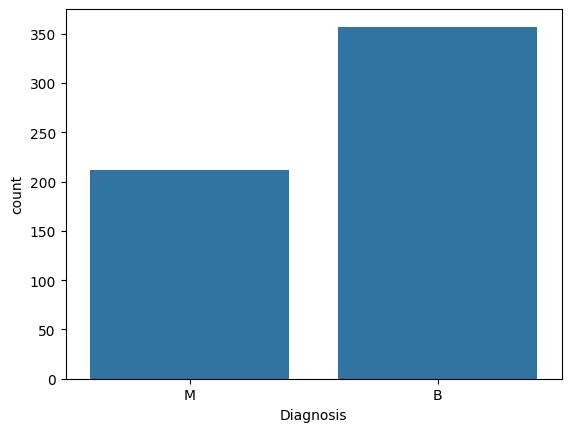

In [90]:
sns.countplot(data=df, x='Diagnosis')

# **Benign are more the Malignant.**

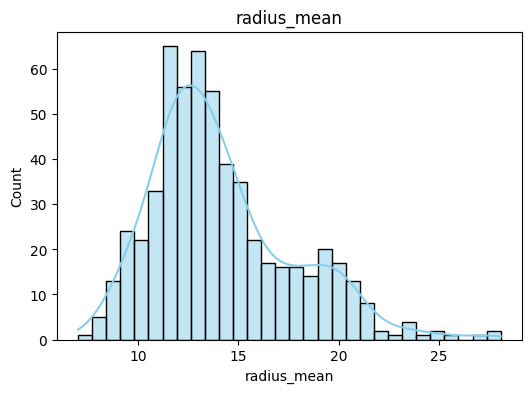

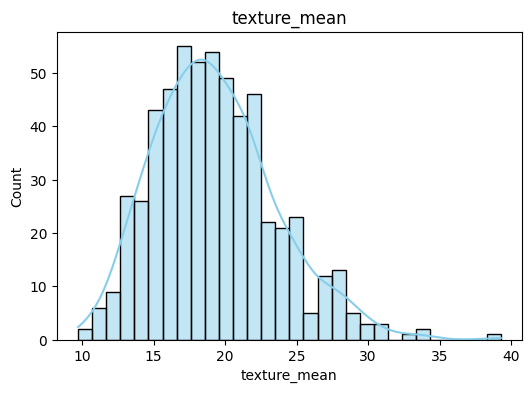

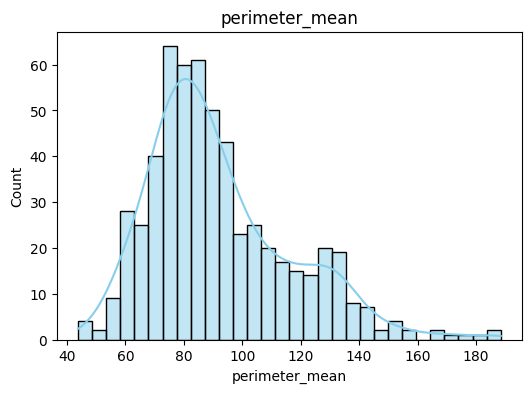

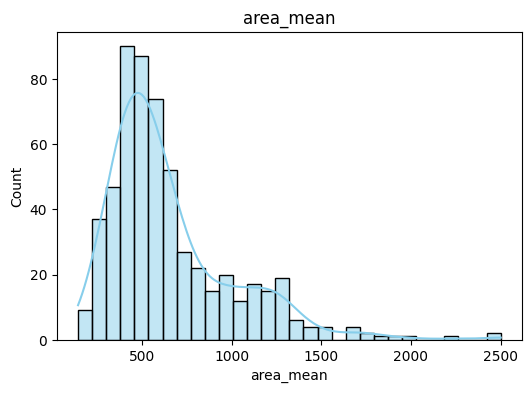

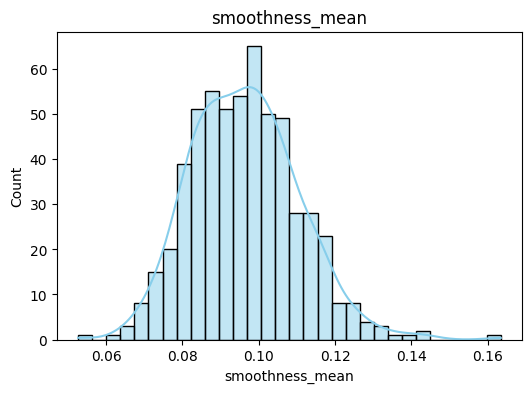

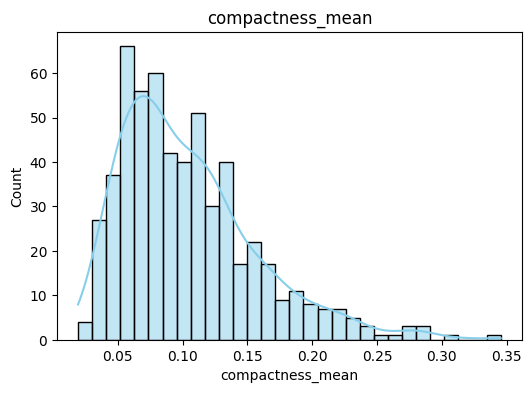

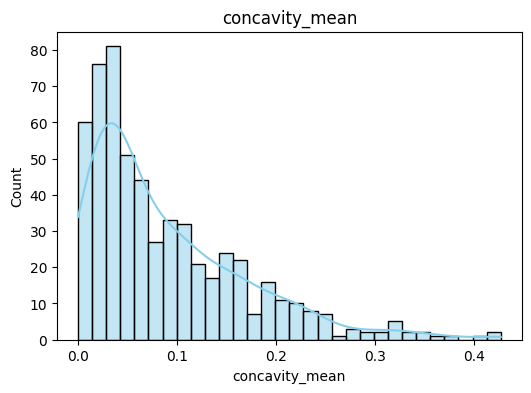

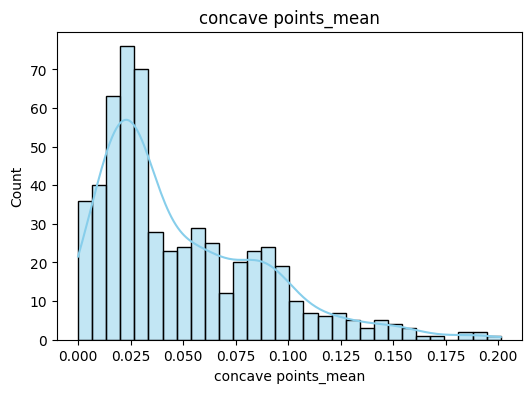

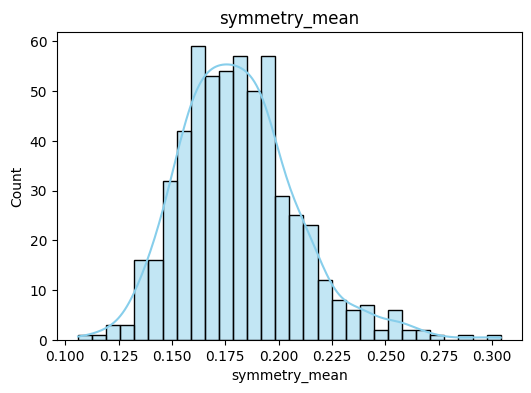

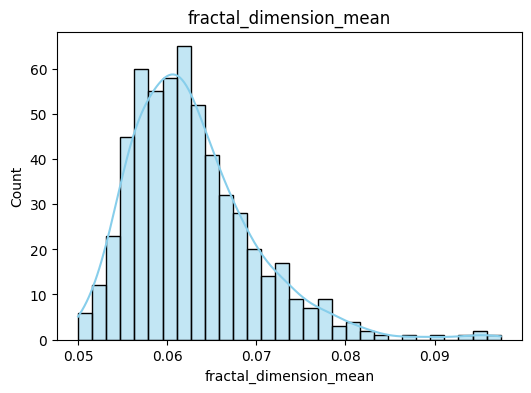

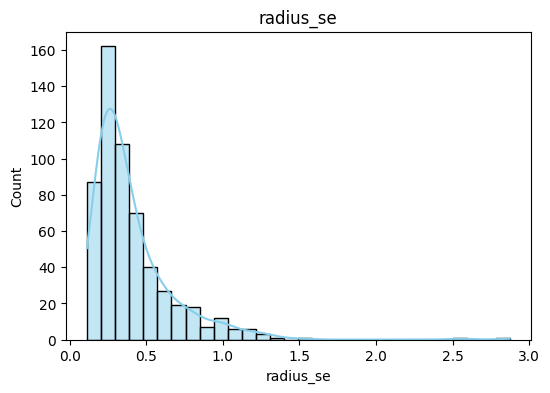

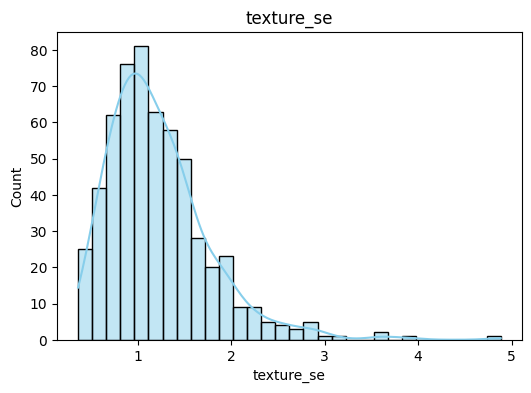

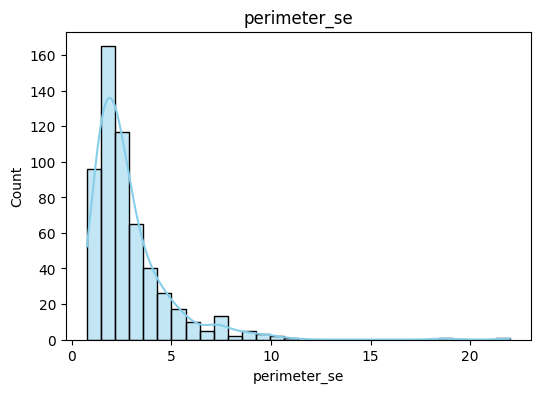

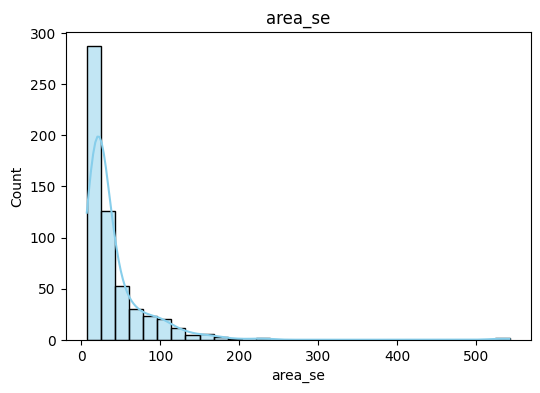

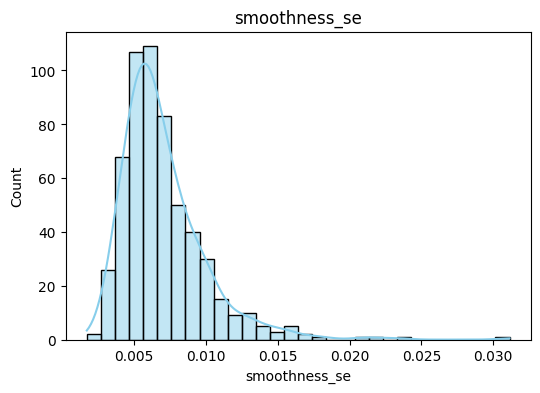

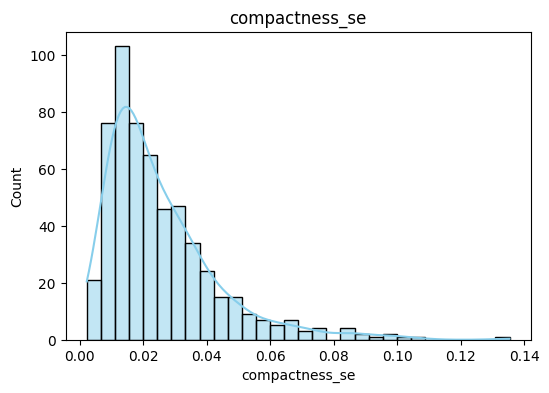

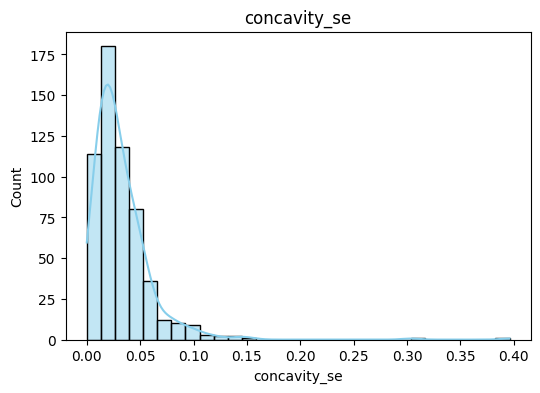

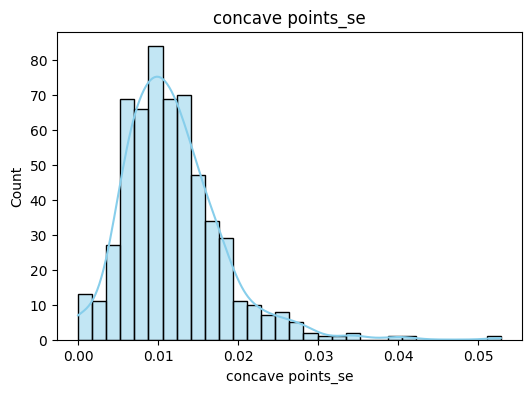

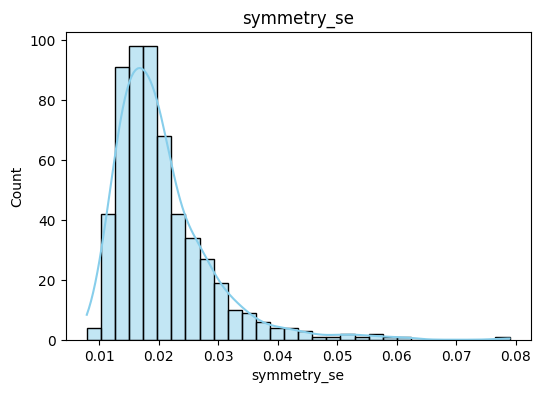

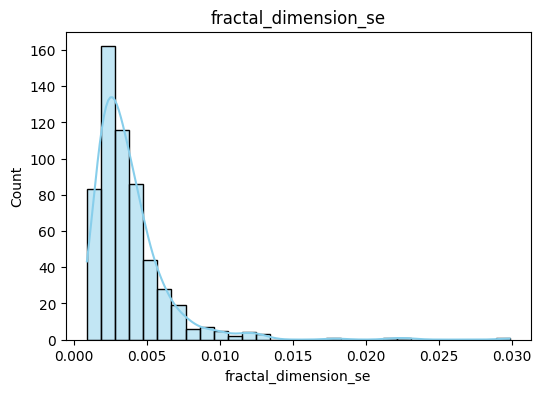

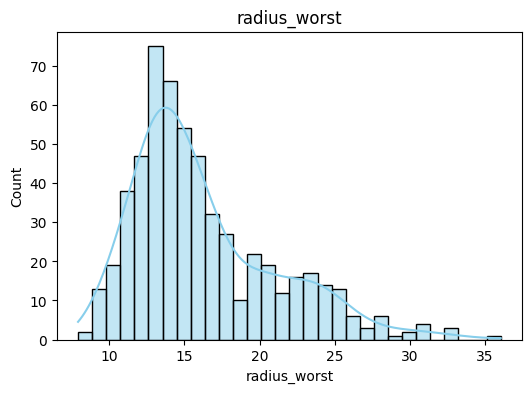

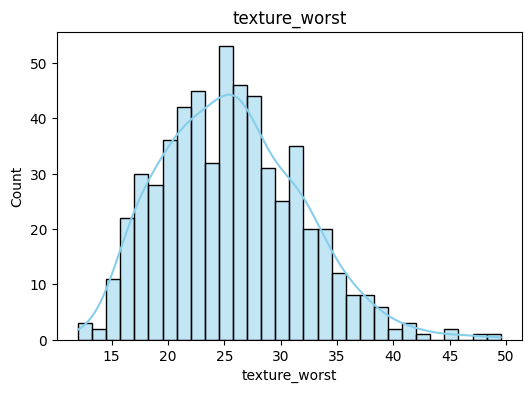

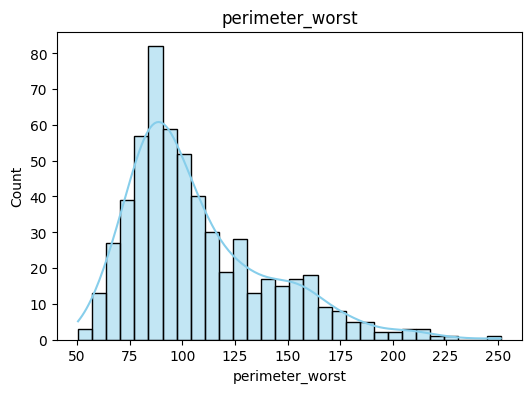

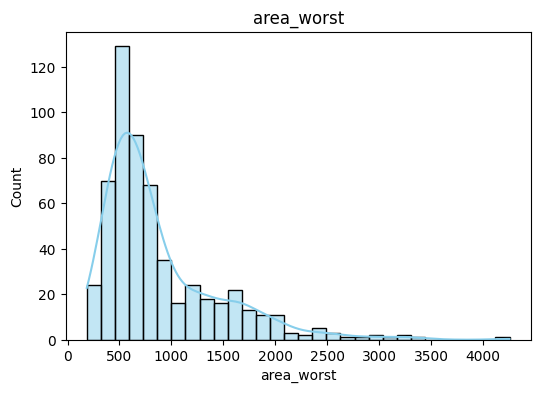

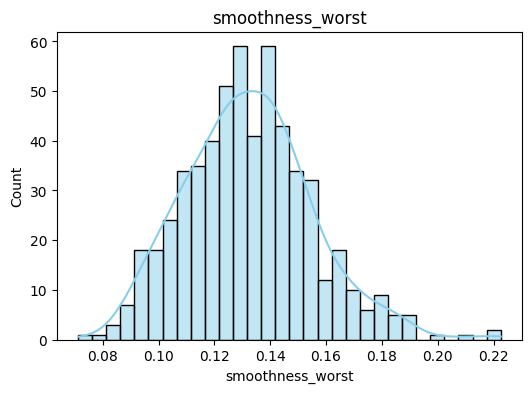

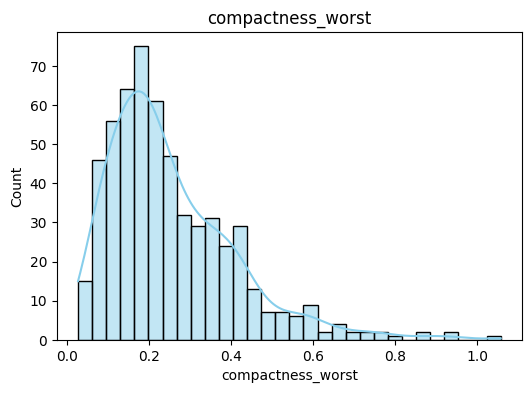

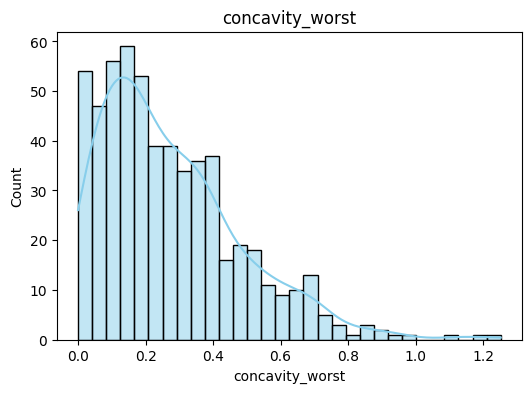

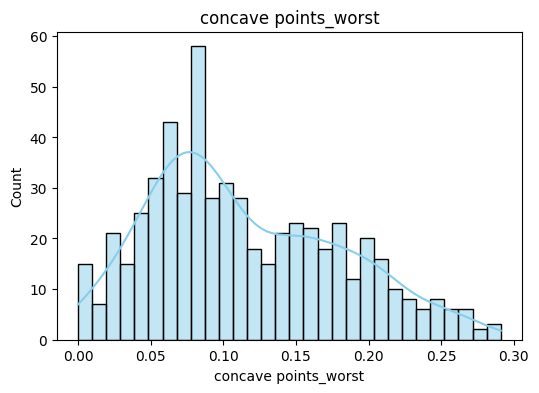

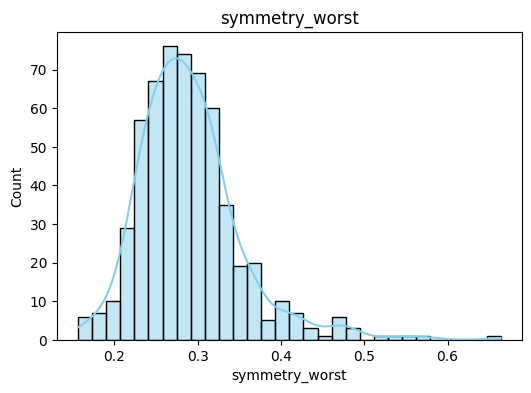

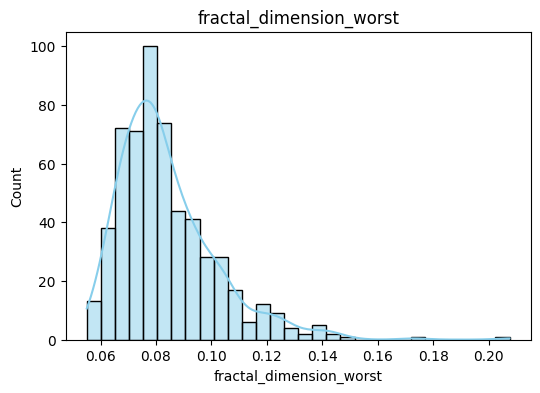

In [91]:
for col in df.columns[1:]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(col)
    plt.show()

# **There is some skewenes in some feaatures so i will deal with it**

In [93]:
def convert(x):
  if(x== 'M'):
    return 1
  else:
    return 0
df['Diagnosis']=df['Diagnosis'].apply(convert)
df.head()


,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

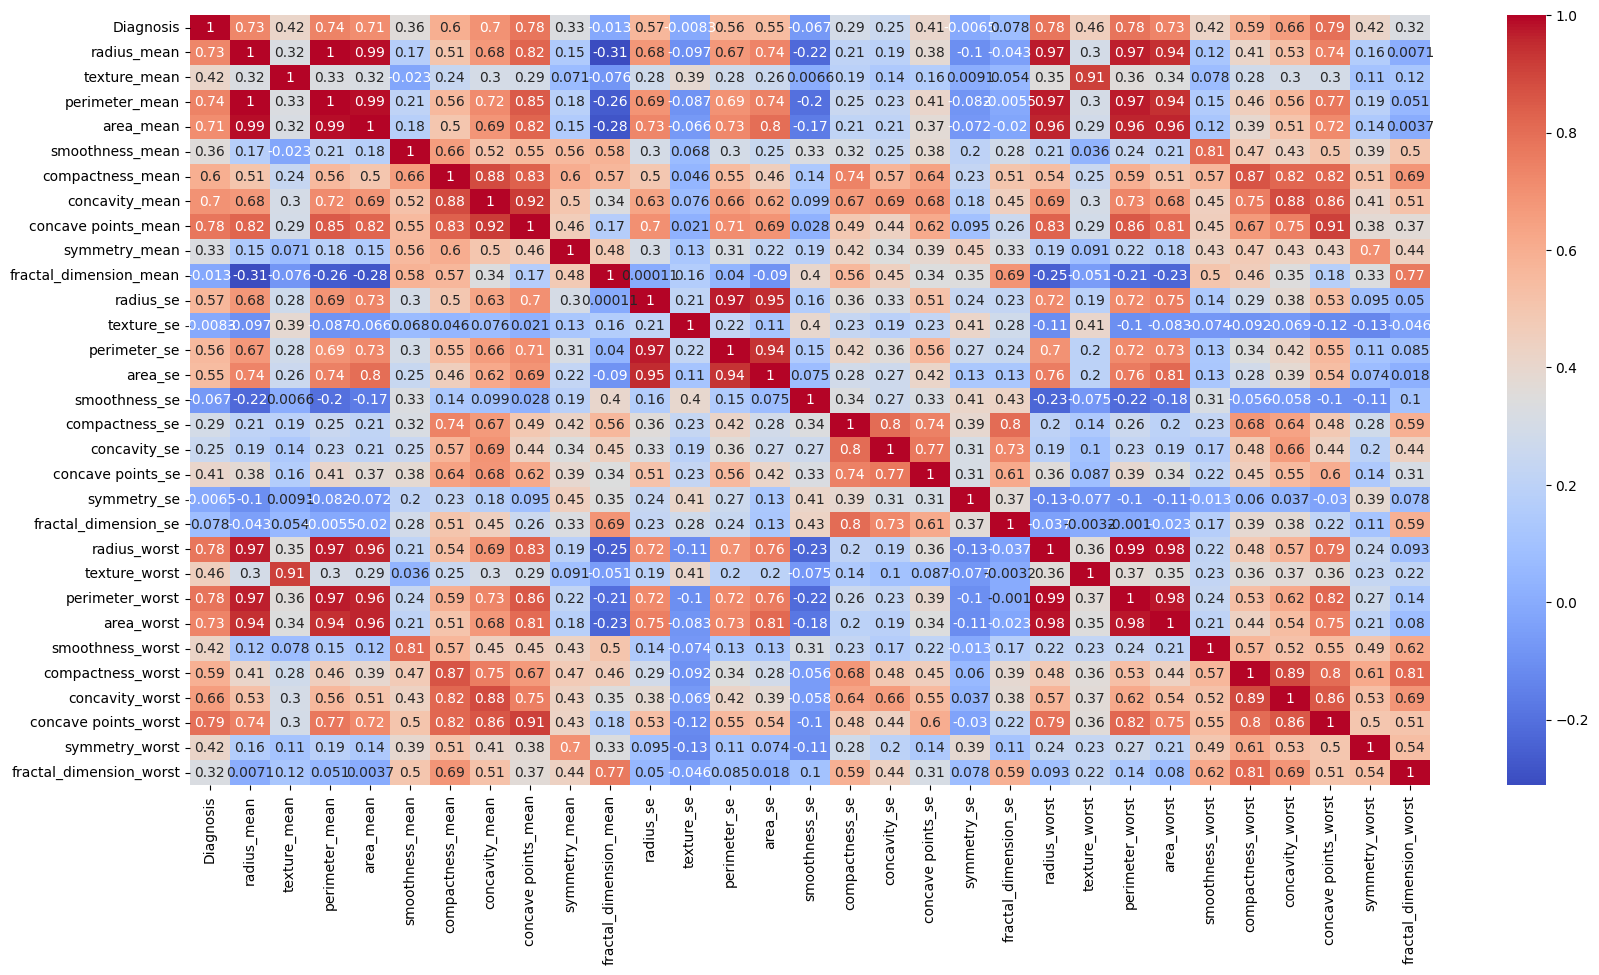

In [94]:
 plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


# **There is alot of strong corrleations so lets drop some features to avoid multicolinearity**




In [95]:
df.drop(columns=['perimeter_mean','area_mean','perimeter_worst','area_worst','concavity_mean','concavity_worst'], inplace=True)

In [96]:
df.columns

Index(['Diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

<Axes: >

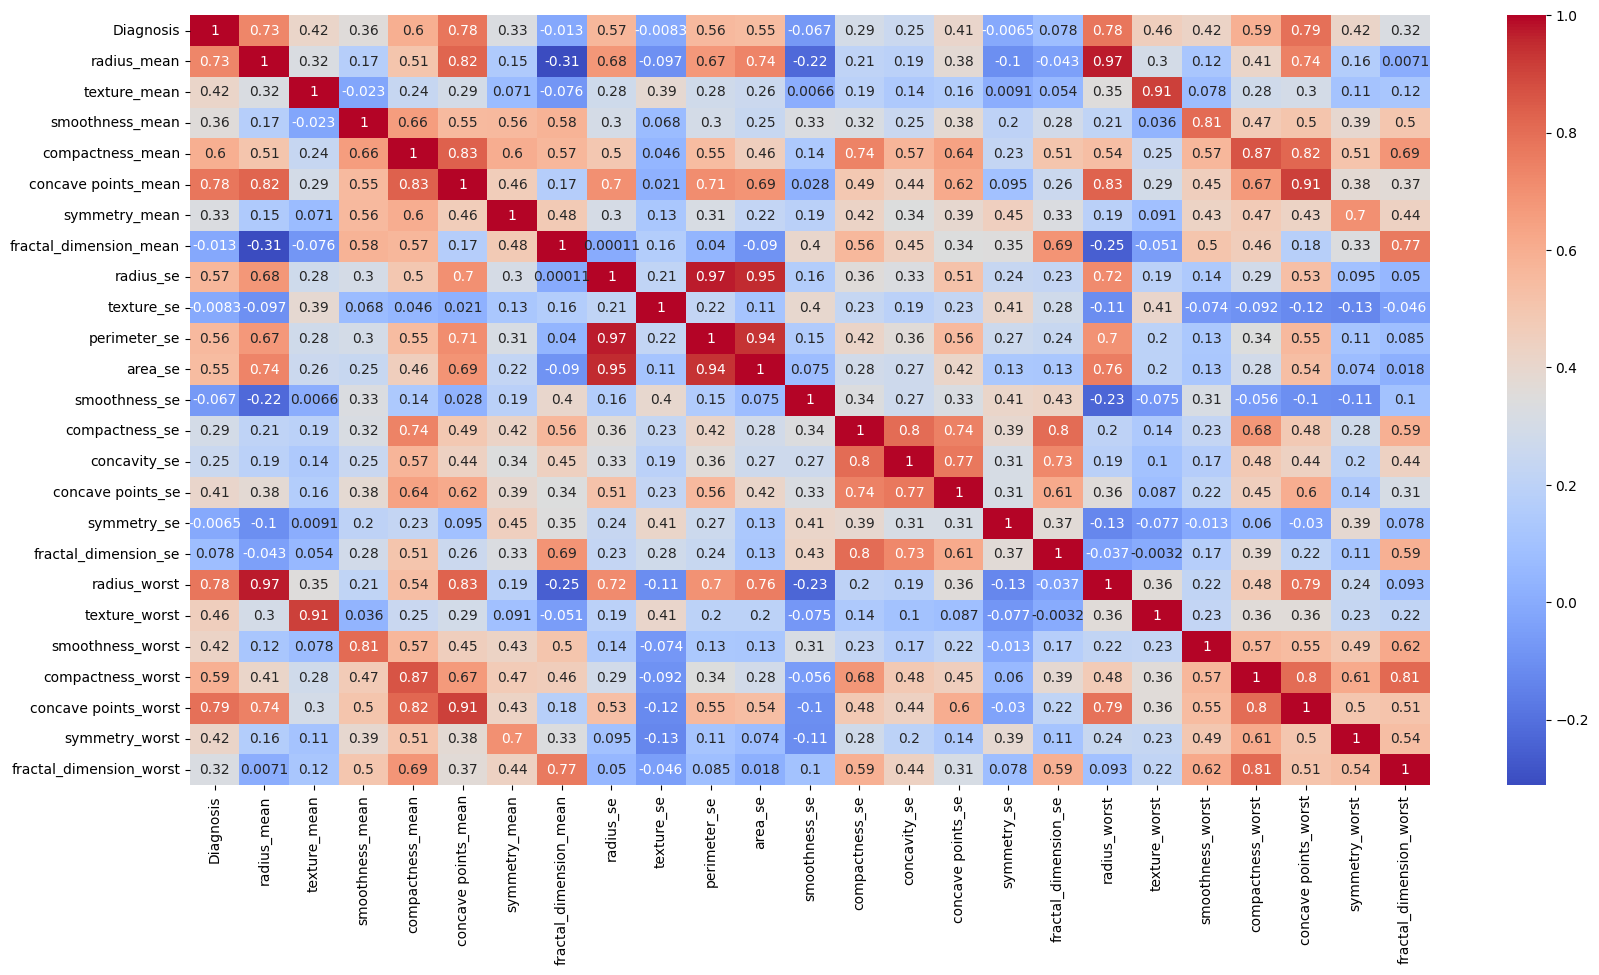

In [97]:
 plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [98]:
df.drop(columns=['radius_worst','texture_worst','smoothness_worst','compactness_worst','concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], inplace=True)

<Axes: >

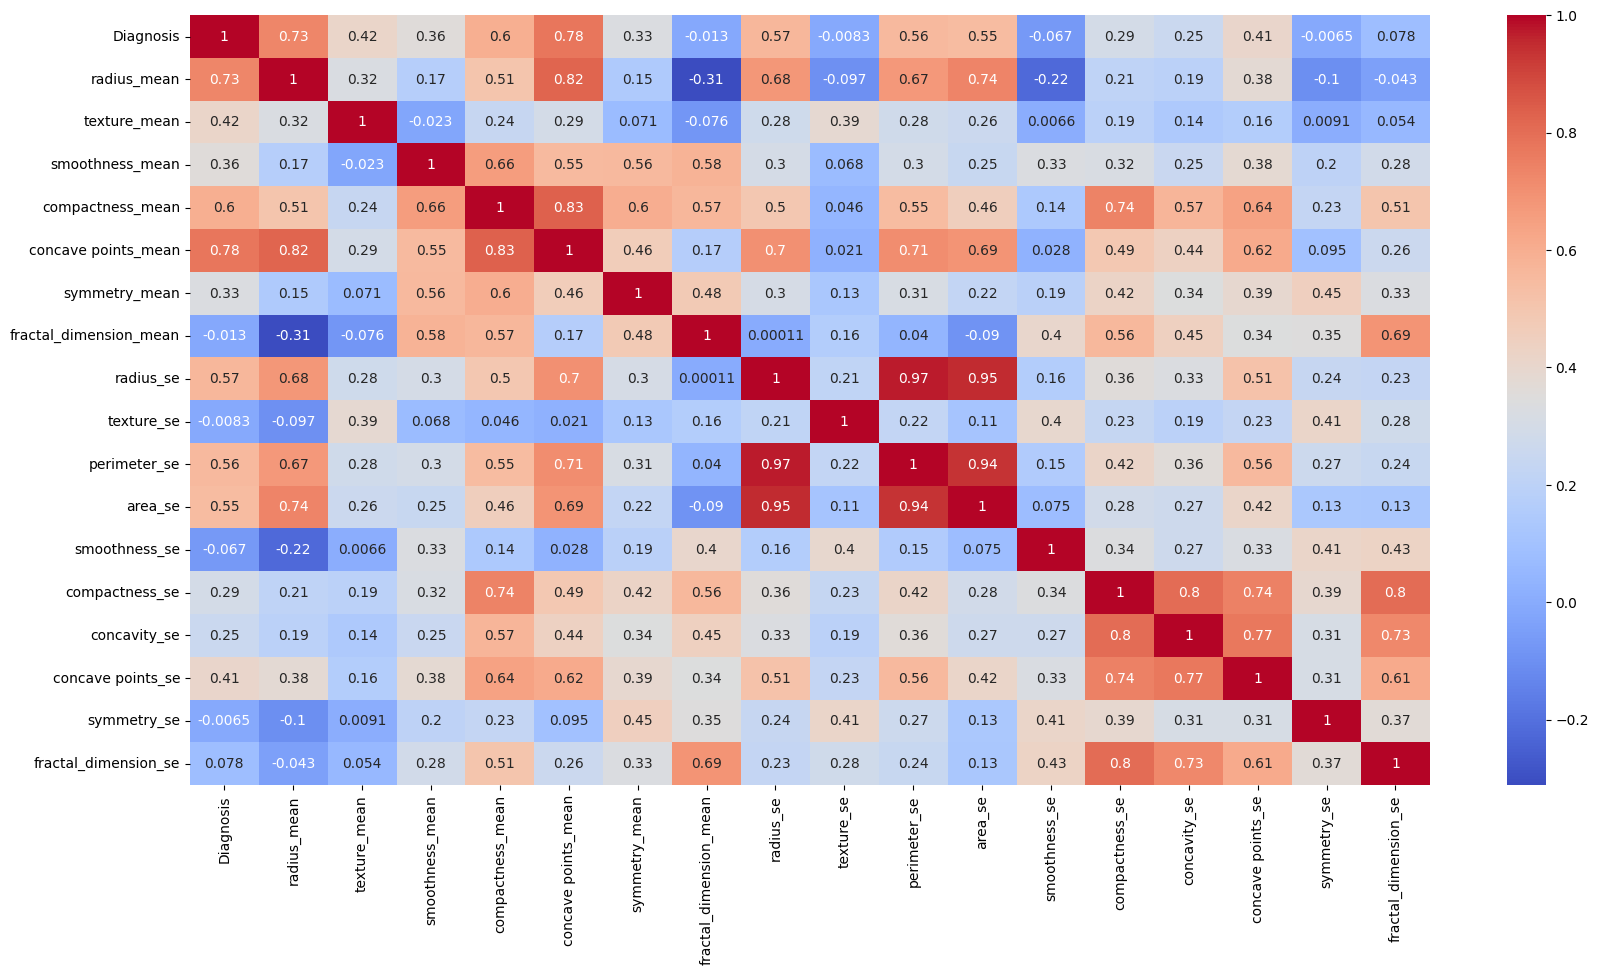

In [99]:
 plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnosis               569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   concave points_mean     569 non-null    float64
 6   symmetry_mean           569 non-null    float64
 7   fractal_dimension_mean  569 non-null    float64
 8   radius_se               569 non-null    float64
 9   texture_se              569 non-null    float64
 10  perimeter_se            569 non-null    float64
 11  area_se                 569 non-null    float64
 12  smoothness_se           569 non-null    float64
 13  compactness_se          569 non-null    float64
 14  concavity_se            569 non-null    fl

In [101]:
df.drop(columns=['perimeter_se','area_se','concave points_se','concavity_se',], inplace=True)

<Axes: >

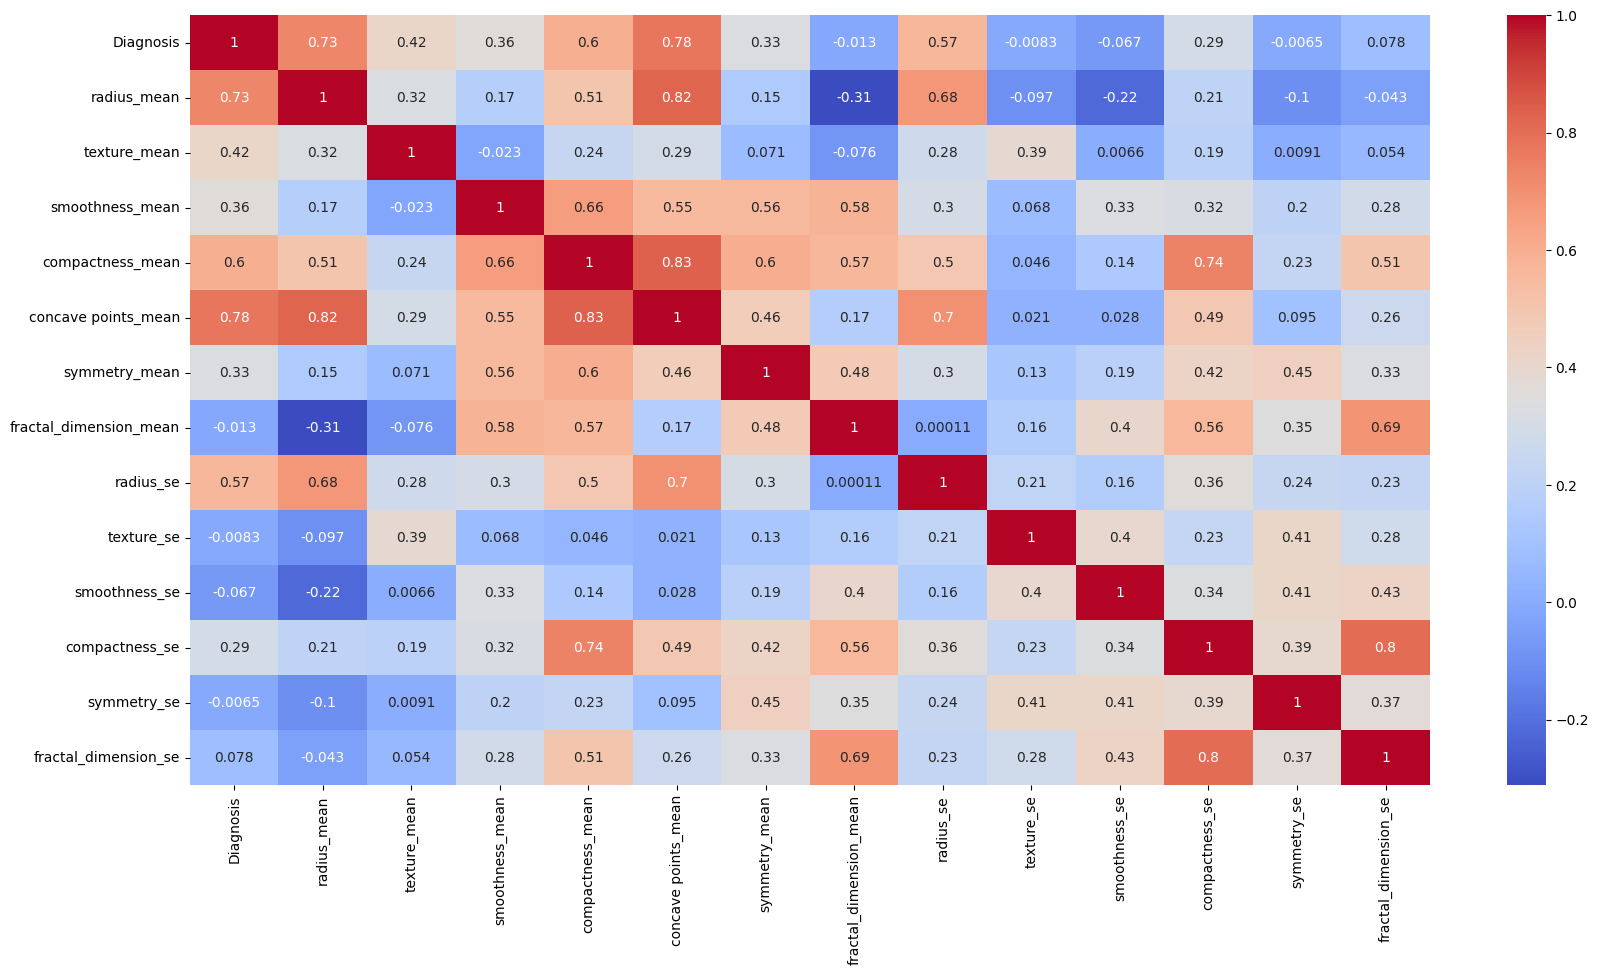

In [102]:
 plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [115]:
X=df.drop(columns='Diagnosis')
Y=df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


In [116]:
SS=StandardScaler()
X_train=SS.fit_transform(X_train)
X_test=SS.transform(X_test)

In [129]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [130]:
y_test_pred=model.predict(X_test)


In [131]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Confusion Matrix:
[[66  6]
 [ 4 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        72
           1       0.86      0.90      0.88        42

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [132]:
y_train_pred=model.predict(X_train)

In [133]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.9560439560439561
Test Accuracy: 0.9122807017543859


# **There is no Overfitting or Underfitting**